![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/IOC_Logo.svg/2341px-IOC_Logo.svg.png)

# Introduction

Welcome to your first day as an analyst working for the IOC! The IOC is at the very heart of world sport, supporting every Olympic Movement stakeholder, promoting Olympism worldwide, and overseeing the regular celebration of the Olympic Games.

For a moment of glory on the medalist podium, elite athletes dedicate *everything* to their sport. Olympics medalists from 1896 through 2016 comprise the dataset you'll be working with. Who are the youngest and oldest medalists of all time? Are there physical differences between Summer Olympics medalists and Winter Olympics medalists? You're about to use your data coding chops to find out!

You'll start this Milestone assignment by cleaning and filtering the data. So many of your Python skills that you've learned so far will be at play. Are you up for it? Let's go!

### Dataset Description

The dataset is stored in a .csv file named `olympics.csv`. It contains the following columns:

* **ID**: A unique identifying number of each athlete
* **Name**: The name of each athlete
* **Sex**: M or F
* **Age**: The age of an athlete, in years, at the time they competed.
* **Height**: The height of an athlete, in centimeters
* **Weight**: The weight of an athlete, in kilograms
* **Team**: The name of the athlete’s team. Not always the name of a country.
* **NOC**: National Olympic Committee’s 3 letter code
* **Games**: Year and season
* **Season**: Summer or Winter
* **City**: Host city
* **Sport**: The sport or category of an olympic event/activity
* **Event**: specific event within a sport, e.g. Men’s 400 meters breaststroke.
* **Medal**: Gold, Silver, Bronze
* **Region**: Name of athlete’s country



# Task 1: Data Inspection

![](https://media.giphy.com/media/42wQXwITfQbDGKqUP7/giphy.gif)

In [2]:
# import the pandas library
import pandas as pd

In [3]:
# Load in the data
df = pd.read_csv("datasets/olympics.csv")

In [4]:
# Preview DataFrame
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
1,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland
3,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland
4,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland


In [5]:
# Inspect the numbers of rows and columns
df.shape

(39783, 16)

In [6]:
# Inspect column names
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region'],
      dtype='object')

In [7]:
# Inspect column data types, memory usage, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39783 entries, 0 to 39782
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      39783 non-null  int64  
 1   Name    39783 non-null  object 
 2   Sex     39783 non-null  object 
 3   Age     39051 non-null  float64
 4   Height  31072 non-null  float64
 5   Weight  30456 non-null  float64
 6   Team    39783 non-null  object 
 7   NOC     39783 non-null  object 
 8   Games   39783 non-null  object 
 9   Year    39783 non-null  int64  
 10  Season  39783 non-null  object 
 11  City    39783 non-null  object 
 12  Sport   39783 non-null  object 
 13  Event   39783 non-null  object 
 14  Medal   39783 non-null  object 
 15  region  39774 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 4.9+ MB


In [8]:
# Display a statistical summary of the data
df.describe()

,ID,Age,Height,Weight,Year
count,39783.000000,39051.000000,31072.000000,30456.000000,39783.000000
mean,69407.051806,25.925175,177.554197,73.770680,1973.943845
std,38849.980737,5.914026,10.893723,15.016025,33.822857
min,4.000000,10.000000,136.000000,28.000000,1896.000000
25%,36494.000000,22.000000,170.000000,63.000000,1952.000000
50%,68990.000000,25.000000,178.000000,73.000000,1984.000000
75%,103461.500000,29.000000,185.000000,83.000000,2002.000000
max,135563.000000,73.000000,223.000000,182.000000,2016.000000


In [9]:
# What types of medals are there?
df["Medal"].unique()

array(['Gold', 'Bronze', 'Silver'], dtype=object)

# Task 2: Data Cleaning

![](https://media.giphy.com/media/10zsjaH4g0GgmY/giphy.gif)

In [10]:
# Rename 'NOC' column to 'CountryCode'
# Rename 'region' column to 'Country'
cols_to_rename = {"region" : "Country"}
df3 = df.rename(columns = cols_to_rename)
df3.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
1,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland
3,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland
4,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland


In [11]:
# Remove the 'Team' column
df2 = df.drop(columns=["Team"])
df2.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
1,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland
3,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland
4,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland


# Task 3: Data Analysis

![](https://media.giphy.com/media/MT5UUV1d4CXE2A37Dg/giphy.gif)

In [12]:
# What is the youngest age of an Olympics medalist?
df["Age"].min()

10.0

In [13]:
# What is the oldest age of an Olympics medalist?
df["Age"].max()

73.0

In [14]:
# How many of each medal were awarded?
df["Medal"].count()

39783

In [16]:
# How many events are there?
df["Event"].count()

39783

In [17]:
# How many sports are there?
df["Sport"].count()

39783

In [18]:
# What is the average age of an Olympics medalist?
df["Age"].describe()

count    39051.000000
mean        25.925175
std          5.914026
min         10.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         73.000000
Name: Age, dtype: float64

In [19]:
# Among the 10 oldest medalists, what are the most common sports?
df.sort_values(by= "Age", ascending = False).head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
6072,22984,John (Herbert Crawford-) Copley (Williamson-),M,73.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Graphic Arts",Silver,UK
8279,30731,Jozu Dupon,M,72.0,NaN,NaN,Belgium,BEL,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Sculpturing, Medals",Bronze,Belgium
33952,117046,Oscar Gomer Swahn,M,72.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Double Shot, Team",Silver,Sweden
21901,75648,Charles William Martin,M,71.0,NaN,NaN,Crabe II-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,Silver,France
21902,75648,Charles William Martin,M,71.0,NaN,NaN,Crabe II-4,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,Bronze,France
12614,45286,Letitia Marion Hamilton,F,69.0,NaN,NaN,Ireland,IRL,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",Bronze,Ireland
34707,119650,Oskar Thiede,M,69.0,NaN,NaN,Austria,AUT,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Medals And...",Silver,Austria
21198,73120,Frederick William MacMonnies,M,68.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Medals And...",Silver,USA
8340,30932,Samuel Harding Duvall,M,68.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Men's Team Round,Silver,USA
25165,87135,Louis Noverraz,M,66.0,179.0,78.0,Switzerland,SUI,1968 Summer,1968,Summer,Mexico City,Sailing,Sailing Mixed 5.5 metres,Silver,Switzerland


In [20]:
# What are the 10 winningest countries in total medal count?
df["region"].value_counts().head(10)
#Describing Data - 20 min

USA          5637
Russia       3947
Germany      3756
UK           2068
France       1777
Italy        1637
Sweden       1536
Canada       1352
Australia    1349
Hungary      1135
Name: region, dtype: int64

In [21]:
# How many medals have been awarded in the sport of trampolining?
df[df["Sport"] == "Trampolining"]["Medal"].count()

30

# Level Up

![](https://media.giphy.com/media/YYaapBJ7UAZp9DJS7o/giphy.gif)

Want to Level Up your practice? We love to see it! Take a crack at some of these extra challenges, including visualizing some of this here data.

In [22]:
# How many gold medals were awarded to the United States?
df[(df["Medal"] == "Gold") & (df["region"] == "USA")].shape[0]

2638

In [23]:
# List the Olympics in dataset, starting with the most recent
sorted(df["Games"].unique(), reverse=True)

['2016 Summer',
 '2014 Winter',
 '2012 Summer',
 '2010 Winter',
 '2008 Summer',
 '2006 Winter',
 '2004 Summer',
 '2002 Winter',
 '2000 Summer',
 '1998 Winter',
 '1996 Summer',
 '1994 Winter',
 '1992 Winter',
 '1992 Summer',
 '1988 Winter',
 '1988 Summer',
 '1984 Winter',
 '1984 Summer',
 '1980 Winter',
 '1980 Summer',
 '1976 Winter',
 '1976 Summer',
 '1972 Winter',
 '1972 Summer',
 '1968 Winter',
 '1968 Summer',
 '1964 Winter',
 '1964 Summer',
 '1960 Winter',
 '1960 Summer',
 '1956 Winter',
 '1956 Summer',
 '1952 Winter',
 '1952 Summer',
 '1948 Winter',
 '1948 Summer',
 '1936 Winter',
 '1936 Summer',
 '1932 Winter',
 '1932 Summer',
 '1928 Winter',
 '1928 Summer',
 '1924 Winter',
 '1924 Summer',
 '1920 Summer',
 '1912 Summer',
 '1908 Summer',
 '1906 Summer',
 '1904 Summer',
 '1900 Summer',
 '1896 Summer']

In [24]:
# Average medalist height in the most recent Winter Olympics
df[(df["Season"] == "Winter") & (df["Year"] == df["Year"].max())]["Height"].mean()

nan

In [25]:
# Average medalist weight in the most recent Winter Olympics
df[(df["Season"] == "Winter") & (df["Year"] == df["Year"].max())]["Weight"].mean()

nan

In [26]:
# Average medalist height in the most recent Summer Olympics
df[(df["Season"] == "Summer") & (df["Year"] == df["Year"].max())]["Height"].mean()

178.37079207920792

In [27]:
# Average medalist weight in the most recent Summer Olympics
df[(df["Season"] == "Summer") & (df["Year"] == df["Year"].max())]["Weight"].mean()

73.96178660049628

In [36]:
# Import plotly express library
import plotly.express as px

In [35]:
# Assign top 10 winningest countries table to a variable
# You did this in task 3
top_10_countries = df["region"].value_counts().head(10)

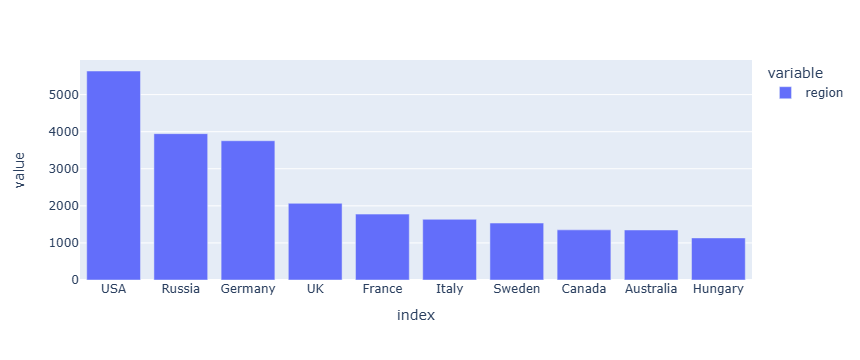

In [34]:
# Visualize the table as a bar chart
px.bar(top_10_countries)